In [1]:
!pip install statsmodels==0.12.1

You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.


In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm, tree
from sklearn.svm import SVC
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics
sns.set()

In [3]:
test_data = pd.read_csv('test2.csv')
gender_data = pd.read_csv('gender_submission.csv')
train_data = pd.read_csv('train.csv')
data = train_data.copy()
test_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,0,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,0,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Chibnall, Mrs. (Edith Martha Bowerman)",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [6]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Univariate Analysis


/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Age')

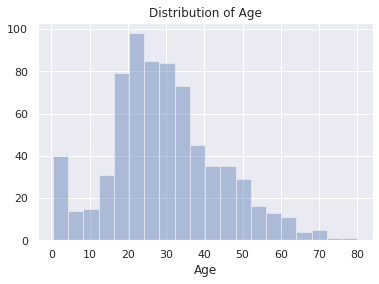

In [7]:
sns.distplot(data.Age, kde=False)
plt.title('Distribution of Age')

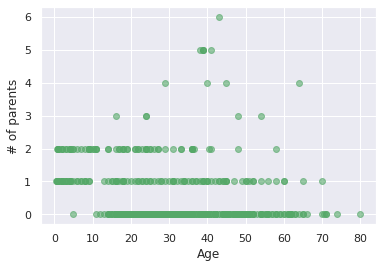

In [8]:
plt.scatter(data['Age'],data['Parch'], color='g', alpha=0.6)
plt.title('')
plt.xlabel('Age')
plt.ylabel('# of parents')
plt.show()

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Distribution of Sibsp')

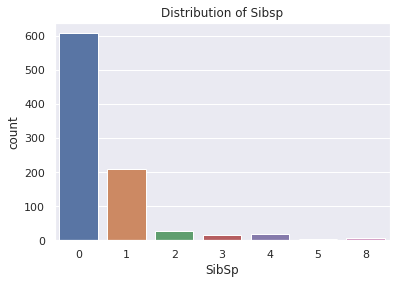

In [9]:
sns.countplot(data['SibSp'])
plt.title('Distribution of Sibsp')
# Var1: raw data
# Var2: 0 and +0
# Var3: drop 

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


0    678
1    118
2     80
3      5
5      5
4      4
6      1
Name: Parch, dtype: int64

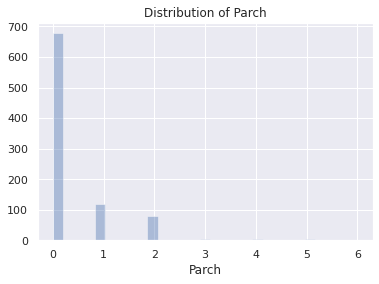

In [10]:
sns.distplot(data.Parch, kde=False)
plt.title('Distribution of Parch')
data['Parch'].value_counts()

# Var1: raw data
# Var2: 0 and +0
# Var3: drop 

In [11]:
data_test = data.copy()
data_test['Survived'] = np.where(data_test['Survived']==1, 'yes', 'no')
data_test.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,no,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,yes,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,yes,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,yes,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,no,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
#y_ratio = data_test.Survived.value_counts().yes / data_test.Survived.value_counts()

In [13]:
 def generate_ratio_df(df, column):
    result = df.loc[:,[column, "y", "Pclass"]].groupby([column, "y"]).agg("count")
    result = result.unstack().reset_index()
    result.columns = result.columns.get_level_values(0)
    result.columns = [column, "y_no_count", "y_yes_count"]
    result["y_ratio"] = result["y_yes_count"] / (result["y_yes_count"] + result["y_no_count"])
    return result

In [14]:
#pclass_df = generate_ratio_df(data_test, data_test['Pclass'])
#display(pclass_df)

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Distribution of Sex')

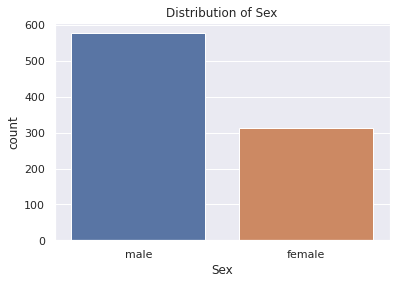

In [15]:
sns.countplot(data['Sex'])
plt.title('Distribution of Sex')

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Distribution of Survived')

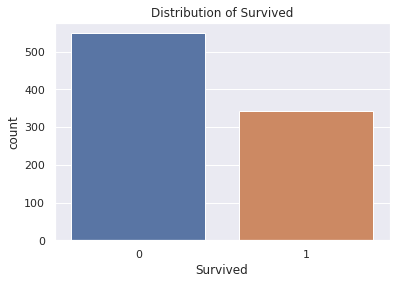

In [16]:

sns.countplot(data['Survived'])
plt.title('Distribution of Survived')

# The targer group is unbalanced, since we have a small data we need up upsample

Text(0.5, 1.0, 'Distribution of Pclass')

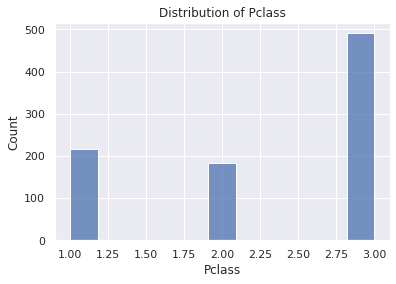

In [17]:
sns.histplot(data['Pclass'])
plt.title('Distribution of Pclass')

Text(0.5, 1.0, 'Distribution of Age')

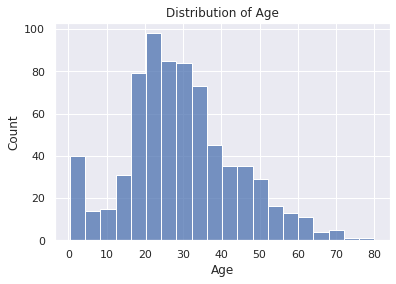

In [18]:
sns.histplot(train_data['Age'])
plt.title('Distribution of Age')

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


<AxesSubplot:xlabel='Fare'>

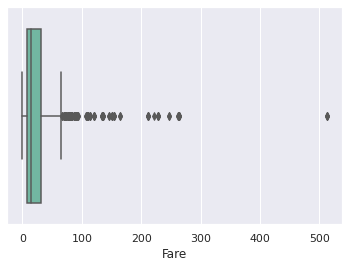

In [19]:
sns.boxplot(data.Fare, orient="v", palette="Set2")

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


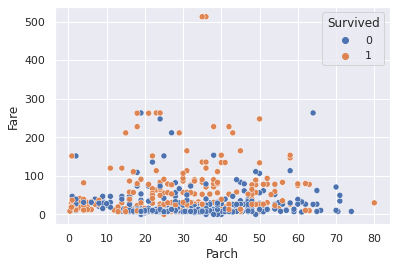

In [20]:
sns.scatterplot(data['Age'], data['Fare'],color='g', hue=data['Survived']) #, hue="Pclass"
plt.title('')
plt.xlabel('Parch')
plt.ylabel('Fare')
plt.show()

Text(0.5, 1.05, 'Pearson correlation of Features')

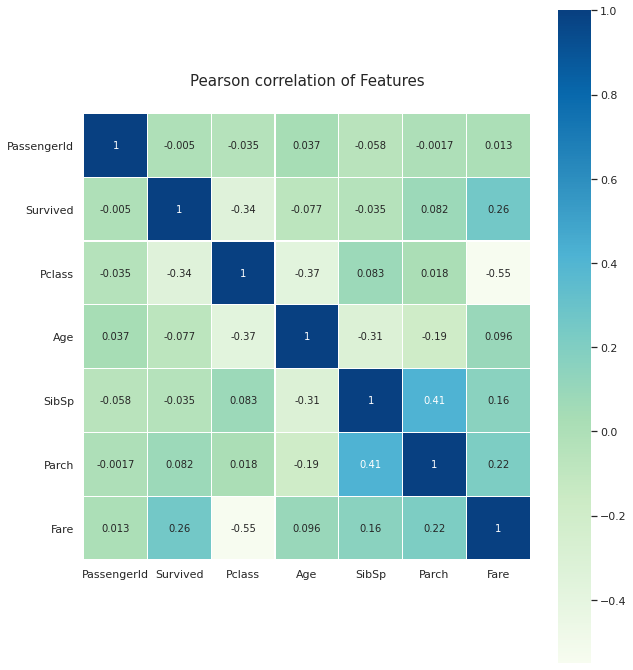

In [21]:
# Correlation Matrix
%matplotlib inline
corr = train_data.corr()
f, ax = plt.subplots(figsize=(10,12))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
_ = sns.heatmap(corr, cmap=plt.cm.GnBu, square=True, ax=ax, annot=True, linewidth=0.1)
plt.title("Pearson correlation of Features", y=1.05, size=15)

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


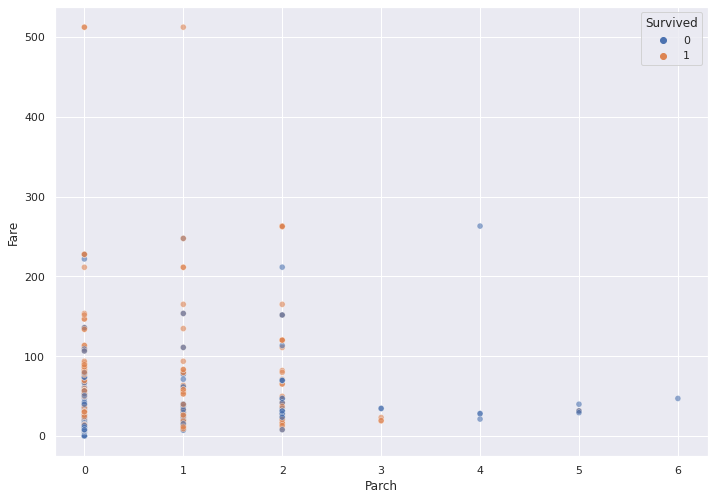

In [22]:
import seaborn as sns

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(data['Parch'],data['Fare'], color='g', alpha=0.6, hue  = data['Survived'])
plt.title('')
plt.xlabel('Parch')
plt.ylabel('Fare')
plt.show()

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


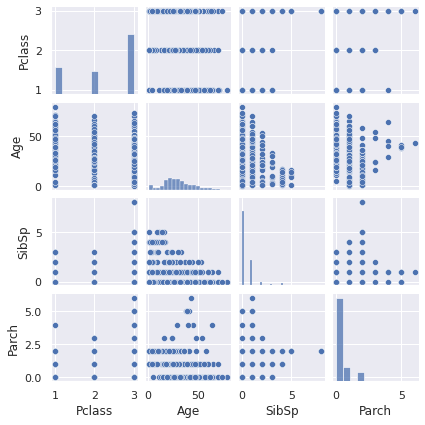

In [23]:
sns.pairplot(data.iloc[:,2:9], size=1.5)#hue=data["Survived"]

# DATA PREPARATION

In [24]:
feature_names = data.keys()

## DROPPING THE DATA  

'Name','Ticket','Cabin','Embarked', 'PassengerId'

In [25]:
data = train_data.drop(['Name','Ticket','Cabin','Embarked','PassengerId'],axis = 1)
t_data = test_data.drop(['Name','Ticket','Cabin','Embarked','PassengerId'],axis = 1)
t_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,34.5,0,0,7.8292
1,0,3,female,47.0,1,0,7.0000
2,0,2,male,62.0,0,0,9.6875
3,0,3,male,27.0,0,0,8.6625
4,0,3,female,22.0,1,1,12.2875
...,...,...,...,...,...,...,...
413,0,3,male,NaN,0,0,8.0500
414,0,1,female,39.0,0,0,108.9000
415,0,3,male,38.5,0,0,7.2500
416,0,3,male,NaN,0,0,8.0500


### UPSAMPLING DATA 


In [26]:
#data_majority = data[data.Survived == 0]
#data_minority = data[data.Survived == 1]

In [27]:
#dataa_upsampled = resample(data_minority, replace=True, n_samples=549,random_state=123)
#data= pd.concat([data_majority,dataa_upsampled])
#data.Survived.value_counts()

## ENCODING

'Sex'

In [28]:
from sklearn.preprocessing import LabelEncoder 
  
le = LabelEncoder() 
  
data['Sex']= le.fit_transform(data[['Sex']]) 
data.head()

t_le = LabelEncoder() 
  
t_data['Sex']= t_le.fit_transform(t_data[['Sex']]) 
t_data.head()

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,34.5,0,0,7.8292
1,0,3,0,47.0,1,0,7.0000
2,0,2,1,62.0,0,0,9.6875
3,0,3,1,27.0,0,0,8.6625
4,0,3,0,22.0,1,1,12.2875


## ADDING BINS

'Age'

In [29]:
data=data.fillna(data.Age.mean())
data.isnull().sum()

t_data=t_data.fillna(t_data.Age.mean())

In [30]:
'''age_bins = [0,10, 20,30,40, 50, 60, 100]
age_label = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60>']
# just changing the row age here
data['Age'] = pd.cut(data['Age'], bins=age_bins, labels=age_label)
data['Age'].describe()'''


"age_bins = [0,10, 20,30,40, 50, 60, 100]\nage_label = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60>']\n# just changing the row age here\ndata['Age'] = pd.cut(data['Age'], bins=age_bins, labels=age_label)\ndata['Age'].describe()"

In [31]:
data.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


# MODELS


## Splitting into X and Y

In [32]:
X_train = data.drop(['Survived'],axis = 1)
Y_train = data['Survived']
X_test = t_data.drop(['Survived'],axis = 1)
Y_test = t_data['Survived']

## Libraries needed for classification models

In [33]:
import os
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix

### Report

In [34]:
report = pd.DataFrame(columns=['Model','Acc.Train','Acc.Test'])

## SVC


In [35]:
svc_model  = SVC(kernel='poly')
svc_clf=svc_model.fit(X_train,Y_train)
# The model can now be applied to the training or test set via
# The model can now be applied to the training or test set via
Y_train_pred = svc_clf.predict(X_train)
Y_test_pred = svc_clf.predict(X_test)


# The confusion matrices and the accuracies can be calculated via
cmtr = confusion_matrix(Y_train, Y_train_pred)
print("Confusion Matrix Training:\n", cmtr)

acctr = accuracy_score(Y_train, Y_train_pred)
print("Accurray Training:", acctr)

cmte = confusion_matrix(Y_test, Y_test_pred)
print("Confusion Matrix Testing:\n", cmte)

accte = accuracy_score(Y_test, Y_test_pred)
print("Accurray Test:", accte)

report.loc[len(report)] = ['SVC', acctr, accte]

Confusion Matrix Training:
 [[532  17]
 [298  44]]
Accurray Training: 0.6464646464646465
Confusion Matrix Testing:
 [[381  37]
 [  0   0]]
Accurray Test: 0.9114832535885168


#### VISUALIZATIONS

In [36]:
#disp = ConfusionMatrixDisplay(confusion_matrix=cmtr,display_labels=clf.classes_)
#disp.plot(colorbar='Blue') 

## KNN

In [37]:
from sklearn.neighbors import KNeighborsClassifier
knnmodel = KNeighborsClassifier(n_neighbors=7)
knnmodel.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=7)

In [38]:
KNNmodel = KNeighborsClassifier(n_neighbors=3)
KNNmodel.fit(X_train,Y_train)
# The model can now be applied to the training or test set via
Y_train_pred = KNNmodel.predict(X_val)
Y_test_pred = KNNmodel.predict(X_test)

# The model can now be applied to the training or test set via
#Y_pred = KNNmodel.predict(X_test)
#print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))

# The confusion matrices and the accuracies can be calculated via
cmtr = confusion_matrix(Y_train, Y_train_pred)
print("Confusion Matrix Training:\n", cmtr)

acctr = accuracy_score(Y_train, Y_train_pred)
print("Accurray Training:", acctr)

cmte = confusion_matrix(Y_test, Y_test_pred)
print("Confusion Matrix Testing:\n", cmte)

accte = accuracy_score(Y_test, Y_test_pred)
print("Accurray Test:", accte)

report.loc[len(report)] = ['k-NN', acctr, accte]

NameError: name 'X_val' is not defined

### To visualize the models

In [ ]:
Y_test_pred = knnmodel.predict_proba(X_test)

accuracies = []

for k in range(1, 21):
    knnmodel = KNeighborsClassifier(n_neighbors=k)
    knnmodel.fit(X_train, Y_train)
    Y_test_pred = knnmodel.predict(X_test)
    accte = accuracy_score(Y_test, Y_test_pred)
    print(k, accte)
    accuracies.append(accte)

1 0.631578947368421
2 0.7918660287081339
3 0.6220095693779905
4 0.7248803827751196
5 0.631578947368421
6 0.7200956937799043
7 0.631578947368421
8 0.6866028708133971
9 0.631578947368421
10 0.6961722488038278
11 0.6578947368421053
12 0.6961722488038278
13 0.6650717703349283
14 0.69377990430622
15 0.6698564593301436
16 0.7033492822966507
17 0.6866028708133971
18 0.7081339712918661
19 0.6794258373205742
20 0.7081339712918661


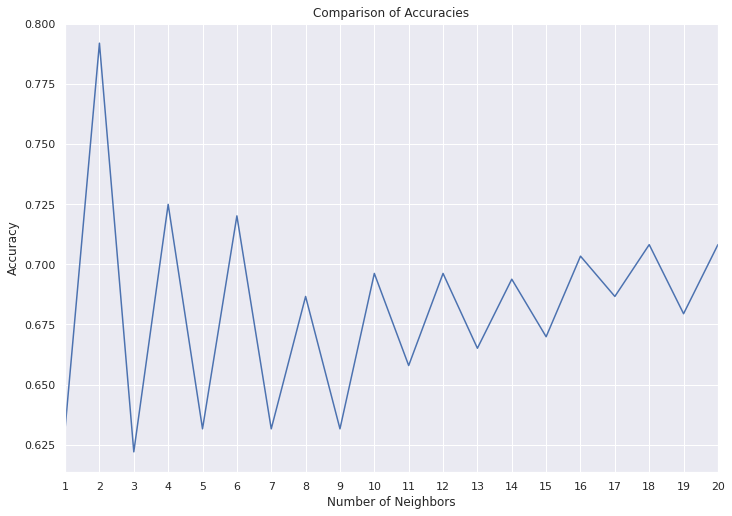

In [ ]:
# visualize the results
plt.plot(range(1, 21), accuracies)
plt.xlim(1,20)
plt.xticks(range(1, 21))
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.title('Comparison of Accuracies')
plt.show()

In [ ]:
opt_k = np.argmax(accuracies) + 1 #accuracies index starts with 0
print('Optimal k =', opt_k)

Optimal k = 2


# Naive Bayes

In [ ]:
# The Naïve Bayes method is implemented in sklearn.naive_bayes.GaussianNB. The model will be created via
from sklearn.naive_bayes import GaussianNB
nbmodel = GaussianNB()
nbmodel.fit(X_train, Y_train)

# The model can now be applied to the training or test set via
Y_train_pred = nbmodel.predict(X_train)
Y_test_pred = nbmodel.predict(X_test)

# The confusion matrices and the accuracies can be calculated via
cmtr = confusion_matrix(Y_train, Y_train_pred)
print("Confusion Matrix Training:\n", cmtr)

acctr = accuracy_score(Y_train, Y_train_pred)
print("Accurray Training:", acctr)

cmte = confusion_matrix(Y_test, Y_test_pred)
print("Confusion Matrix Testing:\n", cmte)

accte = accuracy_score(Y_test, Y_test_pred)
print("Accurray Test:", accte)

# Add the results to the report
report.loc[len(report)] = ['Naive Bayes', acctr, accte]


Confusion Matrix Training:
 [[465  84]
 [101 241]]
Accurray Training: 0.792368125701459
Confusion Matrix Testing:
 [[249 169]
 [  0   0]]
Accurray Test: 0.5956937799043063


In [ ]:
report

,Model,Acc.Train,Acc.Test
0,SVC,0.646465,0.911483
1,k-NN,0.841751,0.622010
2,Naive Bayes,0.792368,0.595694


# Decision Trees

### 1. Simple Decision Tree

In [ ]:
# LIBRARIES
from sklearn.tree import DecisionTreeClassifier
etmodel = DecisionTreeClassifier(criterion='entropy',random_state=0)
etmodel.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
Y_train_pred = etmodel.predict(X_train)
cmtr = confusion_matrix(Y_train, Y_train_pred)
print("Confusion Matrix Training:\n", cmtr)

acctr = accuracy_score(Y_train, Y_train_pred)
print("Accurray Training:", acctr)

Y_test_pred = etmodel.predict(X_test)
cmte = confusion_matrix(Y_test, Y_test_pred)
print("Confusion Matrix Testing:\n", cmte)

accte = accuracy_score(Y_test, Y_test_pred)
print("Accurray Test:", accte)

report.loc[len(report)] = ['Decision Tree', acctr, accte]

Confusion Matrix Training:
 [[547   2]
 [ 14 328]]
Accurray Training: 0.9820426487093153
Confusion Matrix Testing:
 [[260 158]
 [  0   0]]
Accurray Test: 0.6220095693779905


Finding the appropriete max_depth value

In [ ]:
accuracies = np.zeros((2,20), float)
for k in range(0, 20):
    etmodel = DecisionTreeClassifier(criterion='entropy',
    random_state=0, max_depth=k+1)
    etmodel.fit(X_train, Y_train)
    Y_train_pred = etmodel.predict(X_train)
    acctr = accuracy_score(Y_train, Y_train_pred)
    accuracies[0,k] = acctr
    Y_test_pred = etmodel.predict(X_test)
    accte = accuracy_score(Y_test, Y_test_pred)
    accuracies[1,k] = accte

Building the plot

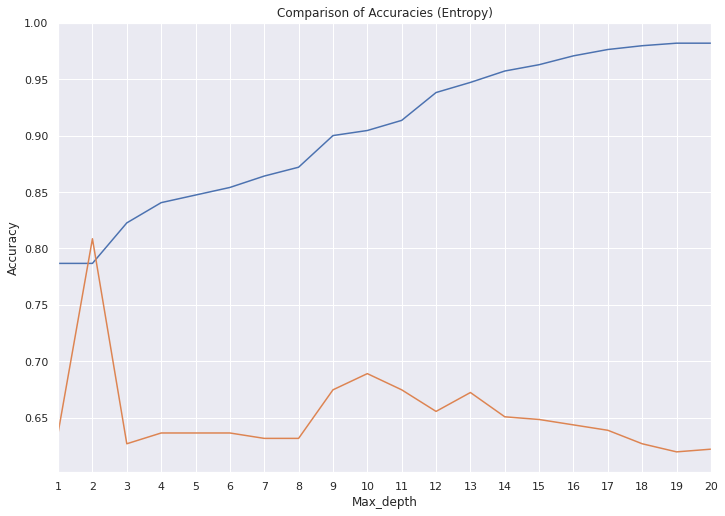

In [ ]:
plt.plot(range(1, 21), accuracies[0,:])
plt.plot(range(1, 21), accuracies[1,:])
plt.xlim(1,20)
plt.xticks(range(1, 21))
plt.xlabel('Max_depth')
plt.ylabel('Accuracy')
plt.title('Comparison of Accuracies (Entropy)')
plt.show()

### Random Forest

In [ ]:
rf_clf=RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train,Y_train)


# The model can now be applied to the training or test set via
Y_pred = rf_clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))

# The confusion matrices and the accuracies can be calculated via
cmtr = confusion_matrix(Y_train, Y_train_pred)
print("Confusion Matrix Training:\n", cmtr)

acctr = accuracy_score(Y_train, Y_train_pred)
print("Accurray Training:", acctr)

cmte = confusion_matrix(Y_test, Y_test_pred)
print("Confusion Matrix Testing:\n", cmte)

accte = accuracy_score(Y_test, Y_test_pred)
print("Accurray Test:", accte)

report.loc[len(report)] = ['k-NN', acctr, accte]

Accuracy: 0.6722488038277512
Confusion Matrix Training:
 [[547   2]
 [ 14 328]]
Accurray Training: 0.9820426487093153
Confusion Matrix Testing:
 [[260 158]
 [  0   0]]
Accurray Test: 0.6220095693779905


In [ ]:
report

,Model,Acc.Train,Acc.Test
0,SVC,0.646465,0.911483
1,k-NN,0.841751,0.622010
2,Naive Bayes,0.792368,0.595694
3,Decision Tree,0.982043,0.622010
4,k-NN,0.982043,0.622010
